<a href="https://colab.research.google.com/github/brendanpshea/programming_problem_solving/blob/main/Java_12_Pacman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Pacman - Software Design and Agile Development
**Brendan Shea, PhD**

Congratulations! You've made it to the final chapter. You know how to write methods, create classes, use loops, and work with arrays. But here's the question every programmer faces when starting a big project: *Where do I even begin?*

Imagine you're about to build a Pacman game. You need to track Pacman's position, move ghosts around a maze, detect collisions, update the score, draw everything on screen, and respond to keyboard input. That's easily 500+ lines of code! If you tried to write it all at once, you'd quickly get lost in a tangled mess of code. Professional programmers solve this problem in two ways: with good **software architecture** and **agile development**.

### Software Architecture: Organizing Your Code

**Software architecture** refers to how you organize and structure your code into manageable pieces. Just as architects design buildings with different rooms for different purposes, software architects organize programs into different components with specific responsibilities.

In this chapter, we'll use a famous pattern called **Model-View-Controller (MVC)**. This pattern divides a program into three distinct parts:

- **Model**: The "brain" of your program. It stores all the data and contains all the game logic. For Pacman, the Model tracks where Pacman is, where the ghosts are, which pellets have been eaten, and what the current score is. It also contains the rules: Can Pacman move through walls? What happens when Pacman touches a ghost?

- **View**: The "eyes" of your program. It handles everything visual—drawing Pacman, the ghosts, the maze, and the score on screen. The View's only job is to *display* information from the Model. It never changes the game state.

- **Controller**: The "coordinator" of your program. It listens for player input (like arrow key presses), tells the Model to update accordingly, and signals the View to redraw the screen. The Controller connects the other two pieces.

Why split things up this way? Imagine you wanted to change Pacman's color from yellow to green. With MVC, you'd only modify the View—the Model and Controller wouldn't need to change at all. Or suppose you wanted to add a new rule where Pacman moves twice as fast. You'd only update the Model. This separation makes your code easier to understand, test, and modify.

### Agile Development: Building Piece by Piece

**Agile development** is a professional software methodology based on a simple philosophy: *build a little, test a little, repeat*. Instead of writing all 500 lines of code and then hoping everything works, you build your program in small, testable increments.

Here's how we'll use agile principles to build Pacman:

1. **Start small**: We'll first create a Model that can just move Pacman around an empty grid
2. **Test it**: Using BlueJ's object inspector, we'll verify Pacman moves correctly
3. **Add one feature**: Next, we'll add walls and collision detection
4. **Test again**: We'll make sure Pacman stops at walls
5. **Repeat**: We'll keep adding features—pellets, scoring, ghosts, graphics—one at a time

Each step produces *working code*. You'll never be far from a program that runs. When you encounter bugs (and you will!), you'll know they're in the code you just wrote, not hidden somewhere in 500 untested lines.

## Planning with Entity-Relationship Diagrams
Before writing any code, professional developers create diagrams to visualize their program's structure. An Entity-Relationship Diagram (ERD) shows the main "things" (entities) in your program and how they relate to each other.

For our Pacman game, we need to identify the key entities in our Model:

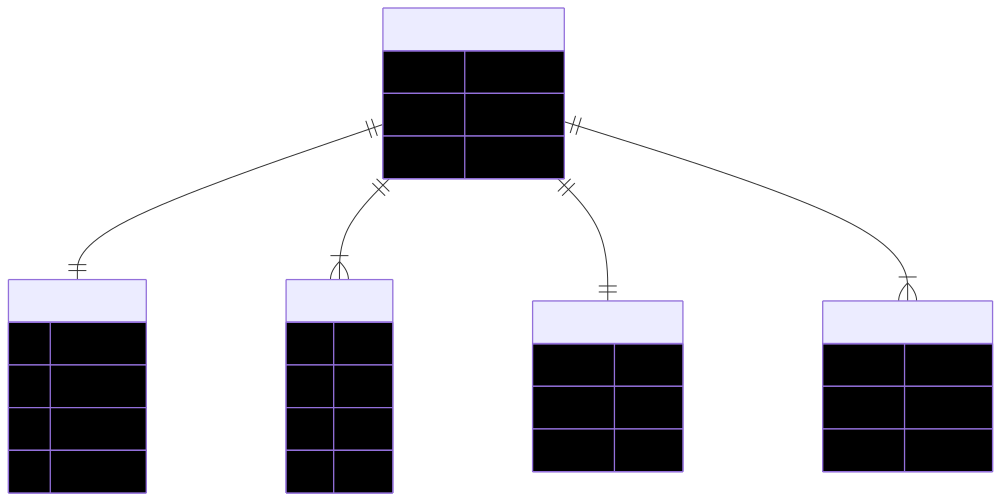

In [ ]:
# @title
import base64
import requests
from IPython.display import SVG, display

def mm(graph: str) -> None:
    """
    Fetch and display a Mermaid diagram as SVG.

    Parameters:
      graph (str): Mermaid graph definition.
    """
    # 1. Encode the graph to Base64
    b64 = base64.urlsafe_b64encode(graph.encode('utf-8')).decode('ascii')
    # 2. Construct the SVG URL
    url = f'https://mermaid.ink/svg/{b64}'
    # 3. Fetch SVG content
    svg_data = requests.get(url).text
    # 4. Render inline in Jupyter
    display(SVG(data=svg_data))

mm("""
erDiagram
    PACMAN-MODEL ||--|| PACMAN : contains
    PACMAN-MODEL ||--|{ GHOST : contains
    PACMAN-MODEL ||--|| MAZE : contains
    PACMAN-MODEL ||--|{ PELLET : tracks

    PACMAN {
        int x
        int y
        int directionX
        int directionY
    }

    GHOST {
        int x
        int y
        int dirX
        int dirY
    }

    MAZE {
        boolean walls
        int width
        int height
    }

    PELLET {
        int x
        int y
        boolean collected
    }

    PACMAN-MODEL {
        int score
        boolean gameOver
        boolean gameWon
    }
    """)

Reading the diagram: The `PacmanModel` contains one `Pacman`, multiple `Ghosts` (shown by the crow's foot notation |{), one `Maze`, and tracks many `Pellets`. Each entity box shows the key data fields we'll need to store.

This ERD serves as our blueprint. When we start coding, we'll translate these entities into Java instance variables and classes. Creating an ERD first helps us think through our design before committing to code—a crucial step in the software development process.

# Planning the Model - What State Do We Need?

Now that we understand MVC and have our ERD blueprint, let's start building! We'll begin with the Model—the brain of our game. Remember, the Model's job is to track *all* the game state and contain *all* the game logic. But what exactly is **game state**?

**Game state** refers to all the data your program needs to remember at any given moment. For Pacman, we need to know: Where is Pacman? Where are the ghosts? Which pellets have been eaten? What's the score? Is the game over? Every piece of information that changes during gameplay is part of the game state.

### Identifying Required State

Let's translate our ERD into specific Java data we need to track:

**For Pacman:**
- Position: `pacmanX` and `pacmanY` (integers for grid coordinates)
- Direction: `directionX` and `directionY` (how Pacman is moving)

**For Ghosts:**
- We'll have multiple ghosts, each with its own position and direction
- We'll use an `ArrayList<Ghost>` to store them
- Each `Ghost` will be an **inner class** (a class defined inside another class)

**For the Maze:**
- A 2D boolean array: `walls[][]` where `true` means wall, `false` means empty space
- Grid dimensions: `GRID_WIDTH` and `GRID_HEIGHT` constants

**For Pellets:**
- Another 2D boolean array: `pellets[][]` where `true` means pellet exists, `false` means collected

**For Game Status:**
- `score` (integer)
- `gameOver` (boolean)
- `gameWon` (boolean)

### Writing the Model Skeleton

Let's create the basic structure of our `PacmanModel` class. We'll add behavior (methods) in later parts—for now, we're just setting up the data:

```java
import java.util.*;

public class PacmanModel {
    // Grid dimensions (constants don't change)
    public static final int GRID_WIDTH = 20;
    public static final int GRID_HEIGHT = 20;
    
    // Pacman's state
    private int pacmanX, pacmanY;
    private int directionX, directionY;
    
    // Ghosts
    private List<Ghost> ghosts;
    
    // Maze and pellets (2D arrays for grid)
    private boolean[][] walls;
    private boolean[][] pellets;
    
    // Game status
    private int score;
    private boolean gameOver;
    private boolean gameWon;
    
    // Inner class for Ghost
    public static class Ghost {
        public int x, y;        // Ghost position
        public int dirX, dirY;  // Ghost direction
        
        public Ghost(int x, int y) {
            this.x = x;
            this.y = y;
            this.dirX = 1;  // Start moving right
            this.dirY = 0;
        }
    }
    
    // Constructor - initializes the game
    public PacmanModel() {
        // For now, just set Pacman in the center
        pacmanX = GRID_WIDTH / 2;
        pacmanY = GRID_HEIGHT / 2;
        directionX = 0;
        directionY = 0;
        
        // Create empty collections (we'll fill these in later)
        ghosts = new ArrayList<>();
        walls = new boolean[GRID_HEIGHT][GRID_WIDTH];
        pellets = new boolean[GRID_HEIGHT][GRID_WIDTH];
        
        score = 0;
        gameOver = false;
        gameWon = false;
    }
    
    // Getter methods so other classes can read our state
    public int getPacmanX() { return pacmanX; }
    public int getPacmanY() { return pacmanY; }
    public int getScore() { return score; }
    public boolean isGameOver() { return gameOver; }
    public boolean isGameWon() { return gameWon; }
    public List<Ghost> getGhosts() { return ghosts; }
}
```



### Understanding Inner Classes

Notice the `Ghost` class is defined *inside* `PacmanModel`. This is called an **inner class**. We use an inner class when one class is tightly coupled to another. Since ghosts only exist as part of our Pacman game, it makes sense to define `Ghost` inside `PacmanModel`. The `static` keyword means we can create `Ghost` objects without needing a `PacmanModel` first.

### Testing in BlueJ

This is where agile development shines! Even though our Model doesn't *do* anything yet, we can test that our structure is correct:

1. **Compile** the `PacmanModel` class in BlueJ (it should compile without errors)
2. **Right-click** on the PacmanModel class and select "new PacmanModel()"
3. **Inspect** the object using BlueJ's object inspector
4. Verify that `pacmanX` is 10, `pacmanY` is 10 (center of 20×20 grid)
5. Verify that `score` is 0 and `gameOver` is false
6. **Call** the getter methods: right-click the object → select `getPacmanX()` → see the result

You've just completed your first agile iteration! You have *working, tested code*. In the next section, we'll add movement logic. But for now, celebrate this milestone—your Model skeleton is ready!

# Building the Model - Movement and Collision Detection

Our Model has data, but it doesn't *do* anything yet. In this part, we'll bring Pacman to life by implementing movement and collision detection. This is where our game state starts changing!

### Understanding Game Updates

Most games work using a **game loop**—a repeating cycle that updates the game state many times per second. Each cycle is called a **frame** or **update**. During each update, we need to:

1. Check Pacman's current direction
2. Calculate where Pacman *wants* to move
3. Check if that new position is valid (not a wall)
4. If valid, update Pacman's position

We'll implement this logic in an `update()` method that will be called repeatedly (later, our Controller will handle the timing).

### Setting Pacman's Direction

First, let's add a method that lets us change Pacman's direction. Add this to your `PacmanModel` class:

```java
public void setDirection(int dx, int dy) {
    this.directionX = dx;
    this.directionY = dy;
}
```

The parameters `dx` and `dy` represent direction: `dx` is horizontal (-1 for left, 1 for right, 0 for no movement) and `dy` is vertical (-1 for up, 1 for down, 0 for no movement). For example, to move right, we'd call `setDirection(1, 0)`.

### Implementing the Update Method

Now for the core game logic. Add this `update()` method:

```java
public void update() {
    if (gameOver || gameWon) return;  // Don't update if game ended
    
    // Calculate where Pacman wants to move
    int newX = pacmanX + directionX;
    int newY = pacmanY + directionY;
    
    // Only move if the new position isn't a wall
    if (!isWall(newX, newY)) {
        pacmanX = newX;
        pacmanY = newY;
    }
}
```

This method demonstrates **defensive programming**—checking conditions before making changes. We don't blindly move Pacman; we first verify the move is legal.

### Checking for Walls

The `update()` method calls `isWall()`, so we need to implement it. Add this helper method:

```java
public boolean isWall(int x, int y) {
    // Check if coordinates are outside the grid
    if (x < 0 || x >= GRID_WIDTH || y < 0 || y >= GRID_HEIGHT) {
        return true;  // Treat out-of-bounds as walls
    }
    return walls[y][x];
}
```

Notice we check bounds first—this prevents **array index out of bounds exceptions** if someone tries to check a position outside our grid.

### Creating the Maze

Let's set up some walls so we can test collision detection. Modify your constructor to call a new `initializeGame()` method:

```java
public PacmanModel() {
    initializeGame();
}

private void initializeGame() {
    // Set Pacman in center
    pacmanX = GRID_WIDTH / 2;
    pacmanY = GRID_HEIGHT / 2;
    directionX = 0;
    directionY = 0;
    
    // Initialize collections
    ghosts = new ArrayList<>();
    walls = new boolean[GRID_HEIGHT][GRID_WIDTH];
    pellets = new boolean[GRID_HEIGHT][GRID_WIDTH];
    
    // Create border walls
    for (int i = 0; i < GRID_HEIGHT; i++) {
        for (int j = 0; j < GRID_WIDTH; j++) {
            // Put walls around the entire border
            if (i == 0 || i == GRID_HEIGHT - 1 ||
                j == 0 || j == GRID_WIDTH - 1) {
                walls[i][j] = true;
            }
        }
    }
    
    score = 0;
    gameOver = false;
    gameWon = false;
}
```

This creates a simple maze with walls around the perimeter. Later we'll add more interesting obstacles!

### Testing Movement in BlueJ

Now for the exciting part—watching Pacman move! Here's your testing sequence:

1. **Create** a new PacmanModel object
2. **Inspect** it: note that `pacmanX` and `pacmanY` are both 10
3. **Right-click** the object → `setDirection(1, 0)` to move right
4. **Right-click** the object → `update()`
5. **Inspect** again: `pacmanX` should now be 11!
6. **Call** `update()` several more times and watch `pacmanX` increase
7. **Test wall collision**: Call `setDirection(0, -1)` to move up, then call `update()` 10 times
8. **Inspect**: `pacmanY` should stop at 1 (the border wall), not go to 0 or negative!

You've just implemented the core game mechanic! Pacman moves around and respects walls. In the next part, we'll add pellets and scoring. Your agile iteration is complete—you have new, tested functionality!

# Completing the Model - Pellets and Scoring

Pacman moves, but there's no goal yet. In this part, we'll add pellets to collect and implement scoring. We'll also add a **win condition**—the rule that determines when the player has successfully completed the game.

### Initializing Pellets

Pellets should appear everywhere *except* walls and Pacman's starting position. Modify your `initializeGame()` method to add this pellet setup after you create the walls:

```java
// Initialize pellets (add this after the wall creation loop)
for (int i = 0; i < GRID_HEIGHT; i++) {
    for (int j = 0; j < GRID_WIDTH; j++) {
        // Place pellets everywhere that's not a wall and not Pacman's start
        pellets[i][j] = !walls[i][j] && !(i == pacmanY && j == pacmanX);
    }
}
```

This uses a compound boolean expression: a pellet exists if the space is NOT a wall AND it's NOT Pacman's starting position. The `!` operator means "not."

### Collecting Pellets and Scoring

Now modify your `update()` method to check for pellet collection. Add this code right after Pacman moves:

```java
public void update() {
    if (gameOver || gameWon) return;
    
    // Move Pacman (existing code)
    int newX = pacmanX + directionX;
    int newY = pacmanY + directionY;
    
    if (!isWall(newX, newY)) {
        pacmanX = newX;
        pacmanY = newY;
        
        // NEW: Check if there's a pellet here
        if (pellets[pacmanY][pacmanX]) {
            pellets[pacmanY][pacmanX] = false;  // Remove the pellet
            score += 10;  // Award points
            
            // Check if player won
            if (allPelletsCollected()) {
                gameWon = true;
            }
        }
    }
}
```

Notice the **state change sequence**: First we move Pacman, then we check for a pellet, then we remove it and update the score, then we check the win condition. Order matters in game programming!


### Implementing the Win Condition

We need a helper method to determine if all pellets are gone. Add this to your class:

```java
private boolean allPelletsCollected() {
    for (int i = 0; i < GRID_HEIGHT; i++) {
        for (int j = 0; j < GRID_WIDTH; j++) {
            if (pellets[i][j]) {
                return false;  // Found a pellet, game not won yet
            }
        }
    }
    return true;  // No pellets remain!
}
```

This method scans the entire grid. If it finds even one pellet, the game isn't won yet. Only if it checks all positions without finding a pellet does it return `true`.

### Adding Getter Methods

Other classes (like our View) will need to check if a pellet exists at a location. Add this getter:

```java
public boolean isPellet(int x, int y) {
    if (x < 0 || x >= GRID_WIDTH || y < 0 || y >= GRID_HEIGHT) {
        return false;
    }
    return pellets[y][x];
}
```

### Testing in BlueJ

Time to test pellet collection! This is more complex than before, so follow carefully:

1. **Create** a new PacmanModel object
2. **Inspect** it: note `score` is 0
3. **Test** `isPellet(11, 10)` by right-clicking and calling the method (should return `true`)
4. **Set** direction right: `setDirection(1, 0)`
5. **Call** `update()` once
6. **Inspect** again: `score` should now be 10!
7. **Test** `isPellet(11, 10)` again (should now return `false`—pellet was collected)
8. **Call** `update()` multiple times and watch the score increase by 10 each time
9. **Call** `getScore()` to see the current score
10. **Bonus**: Try to collect all pellets by changing directions and updating many times

You'll notice that with hundreds of pellets, manually testing victory is tedious—this is exactly why we'll build a visual interface next!

### Checkpoint: What We've Built

Your Model is now functionally complete for basic gameplay! It tracks Pacman's position, detects wall collisions, handles pellet collection, updates scoring, and recognizes victory. This demonstrates the power of agile development: we built features incrementally, testing each one. Next, we'll add ghosts and danger!

# Adding Ghosts - AI and Game Over

Our game has a goal (collect pellets) but no challenge yet. Time to add danger! In this part, we'll create ghosts that chase Pacman around the maze, introducing **artificial intelligence (AI)**—code that makes computer-controlled entities behave intelligently.

### Creating Ghosts

First, let's spawn some ghosts when the game starts. Add this to your `initializeGame()` method, right after initializing the collections:

```java
// Create ghosts (add after creating the ArrayList)
ghosts.add(new Ghost(3, 3));
ghosts.add(new Ghost(GRID_WIDTH - 4, 3));
ghosts.add(new Ghost(3, GRID_HEIGHT - 4));
```

We're placing three ghosts in different corners of the maze. Each `Ghost` constructor sets its initial direction to move right (remember from earlier: `dirX = 1`, `dirY = 0`).



### Simple Ghost AI

Now for the interesting part—making ghosts chase Pacman! Add this method to your `PacmanModel` class:

```java
private void moveGhost(Ghost ghost) {
    // Calculate where ghost wants to move
    int newX = ghost.x + ghost.dirX;
    int newY = ghost.y + ghost.dirY;
    
    // If ghost hits wall or 20% random chance, pick new direction
    if (isWall(newX, newY) || Math.random() < 0.2) {
        // Create list of possible directions
        List<int[]> directions = new ArrayList<>();
        
        // Prefer directions toward Pacman
        if (pacmanX > ghost.x) directions.add(new int[]{1, 0});   // Right
        if (pacmanX < ghost.x) directions.add(new int[]{-1, 0});  // Left
        if (pacmanY > ghost.y) directions.add(new int[]{0, 1});   // Down
        if (pacmanY < ghost.y) directions.add(new int[]{0, -1});  // Up
        
        // Add all directions for randomness
        directions.add(new int[]{1, 0});
        directions.add(new int[]{-1, 0});
        directions.add(new int[]{0, 1});
        directions.add(new int[]{0, -1});
        
        // Shuffle and try directions until we find a valid one
        Collections.shuffle(directions);
        for (int[] dir : directions) {
            if (!isWall(ghost.x + dir[0], ghost.y + dir[1])) {
                ghost.dirX = dir[0];
                ghost.dirY = dir[1];
                break;
            }
        }
    }
    
    // Move the ghost
    newX = ghost.x + ghost.dirX;
    newY = ghost.y + ghost.dirY;
    if (!isWall(newX, newY)) {
        ghost.x = newX;
        ghost.y = newY;
    }
}
```

This AI demonstrates **heuristic behavior**—it's not perfect, but it's effective. The ghost prefers directions that bring it closer to Pacman, but randomness keeps it from being too predictable. The 20% random chance prevents ghosts from getting stuck in corners.

### Moving All Ghosts

Now update your `update()` method to move ghosts. Add this code after the pellet collection logic but before the closing brace:

```java
// Move all ghosts (add before the final closing brace)
for (Ghost ghost : ghosts) {
    moveGhost(ghost);
}

// Check for collision with ghosts
for (Ghost ghost : ghosts) {
    if (ghost.x == pacmanX && ghost.y == pacmanY) {
        gameOver = true;
    }
}
```

We use a **for-each loop** to process each ghost. First we move them all, then we check if any occupy the same position as Pacman. If so, game over!

### Testing in BlueJ

Ghost AI is tricky to test manually, but we can verify the basics:

1. **Create** a new PacmanModel object
2. **Inspect** the `ghosts` ArrayList: you should see three Ghost objects
3. **Inspect** one of the ghosts: note its `x` and `y` coordinates
4. **Call** `update()` several times
5. **Inspect** the ghost again: its position should change
6. **Watch** multiple updates: the ghost should eventually move toward Pacman (around position 10, 10)
7. **Test collision**: Use `setDirection()` and `update()` to move Pacman toward a ghost
8. **Keep** updating until Pacman and a ghost occupy the same space
9. **Call** `isGameOver()`: should return `true`!

### The Model is Complete!

Congratulations! Your `PacmanModel` class now contains all the game logic. It handles movement, collisions, pellet collection, scoring, ghost AI, and win/lose conditions. You've built this incrementally—testing each feature before moving on. In the next section, we'll create the View to visualize everything you've built!

# Creating the View - Basic Rendering Setup

Your Model is complete, but it's invisible! Time to create the View—the visual representation of your game. In this part, we'll learn about Java's graphics system and set up the infrastructure for drawing.

### It's Time for Java Swing

**Java Swing** is a library for creating graphical user interfaces (GUIs). It provides components like windows, buttons, and panels. For our game, we'll use a `JPanel`—a blank canvas we can draw on.

The key to custom graphics is overriding the **`paintComponent()` method**. Java automatically calls this method whenever your panel needs to be drawn or redrawn. You never call `paintComponent()` yourself—instead, you provide the code that *defines* how things should look, and Java handles the rest.

### The View's Role in MVC

Remember: the View's *only* job is to display information. It reads data from the Model but never changes it. The View doesn't know about game rules, collision detection, or scoring logic—it just paints what the Model tells it.

### Creating the View Skeleton

Create a new class called `PacmanView`. Here's the basic structure:

```java
import javax.swing.*;
import java.awt.*;

public class PacmanView extends JPanel {
    private PacmanModel model;
    private static final int CELL_SIZE = 30;
    
    // Colors for game elements
    private static final Color WALL_COLOR = new Color(33, 33, 222);
    private static final Color PACMAN_COLOR = Color.YELLOW;
    private static final Color GHOST_COLOR = Color.RED;
    private static final Color PELLET_COLOR = Color.WHITE;
    private static final Color BACKGROUND_COLOR = Color.BLACK;
    
    public PacmanView(PacmanModel model) {
        this.model = model;
        
        // Calculate panel size based on grid
        setPreferredSize(new Dimension(
            PacmanModel.GRID_WIDTH * CELL_SIZE,
            PacmanModel.GRID_HEIGHT * CELL_SIZE + 50  // Extra space for score
        ));
        
        setBackground(BACKGROUND_COLOR);
    }
    
    @Override
    protected void paintComponent(Graphics g) {
        super.paintComponent(g);
        
        // We'll add drawing methods here later
        // For now, just draw a test message
        g.setColor(Color.WHITE);
        g.drawString("Pacman View Working!", 50, 50);
    }
}
```



### Understanding the Code

Let's break down what we've created:

**Constants**: `CELL_SIZE` determines how many pixels each grid square occupies. With a 20×20 grid and 30-pixel cells, our game will be 600×600 pixels. The color constants use descriptive names to make the code readable.

**Constructor**: Takes a `PacmanModel` reference and stores it. Notice we calculate the panel size based on the grid dimensions—if we change `GRID_WIDTH`, the panel automatically adjusts! We add 50 extra pixels at the bottom for displaying the score.

**`paintComponent()` method**: This is where all drawing happens. The `Graphics g` parameter is your "paintbrush." We call `super.paintComponent(g)` first to clear the previous frame, then use `g` to draw. The `@Override` annotation tells Java we're replacing the default implementation.

### The Graphics Object

The **`Graphics` object** provides methods for drawing:
- `drawString(text, x, y)` - draws text
- `fillRect(x, y, width, height)` - draws filled rectangles
- `fillOval(x, y, width, height)` - draws filled circles/ovals
- `setColor(color)` - changes the drawing color

We'll use these extensively later to draw our game!

### Adding a Test Main Method

Let's add a simple `main()` method so we can actually see our View working! Add this to your `PacmanView` class:

```java
// Temporary test method (we'll remove this later)
public static void main(String[] args) {
    JFrame frame = new JFrame("Pacman View Test");
    frame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
    
    PacmanModel model = new PacmanModel();
    PacmanView view = new PacmanView(model);
    
    frame.add(view);
    frame.pack();
    frame.setVisible(true);
}
```

This creates a window (`JFrame`), adds our View to it, sizes it appropriately (`pack()`), and makes it visible. This is a temporary testing method—when we finalize the game, we'll move this code to a proper `PacmanGame` class.

### Testing in BlueJ

Now you can see your View in action:

1. **Compile** `PacmanView`
2. **Right-click** on the PacmanView class (not an object, the class itself!)
3. **Select** `void main(String[] args)`
4. **Watch** a window appear with a black background and "Pacman View Working!" message

You should see a 600×650 pixel black window with white text. If you see this, your View is correctly set up! Later, we'll replace that test message with actual game graphics.

# Completing the View - Drawing the Game

Time to bring your game to life visually! In this part, we'll implement methods to draw every element of the game. We'll build these as separate methods to keep our code organized—each method has one clear responsibility.

### Drawing the Maze

Replace the test message in your `paintComponent()` method with calls to drawing methods. First, let's draw the walls:

```java
@Override
protected void paintComponent(Graphics g) {
    super.paintComponent(g);
    
    drawMaze(g);
    drawPellets(g);
    drawPacman(g);
    drawGhosts(g);
    drawScore(g);
    drawGameStatus(g);
}

private void drawMaze(Graphics g) {
    g.setColor(WALL_COLOR);
    for (int y = 0; y < PacmanModel.GRID_HEIGHT; y++) {
        for (int x = 0; x < PacmanModel.GRID_WIDTH; x++) {
            if (model.isWall(x, y)) {
                g.fillRect(x * CELL_SIZE, y * CELL_SIZE, CELL_SIZE, CELL_SIZE);
            }
        }
    }
}
```

We scan every grid position. When we find a wall, we draw a filled rectangle. Notice how we convert grid coordinates to pixel coordinates: multiply by `CELL_SIZE`. Grid position (5, 3) becomes pixel position (150, 90).

### Drawing Pellets

Add this method below `drawMaze()`:

```java
private void drawPellets(Graphics g) {
    g.setColor(PELLET_COLOR);
    for (int y = 0; y < PacmanModel.GRID_HEIGHT; y++) {
        for (int x = 0; x < PacmanModel.GRID_WIDTH; x++) {
            if (model.isPellet(x, y)) {
                int centerX = x * CELL_SIZE + CELL_SIZE / 2;
                int centerY = y * CELL_SIZE + CELL_SIZE / 2;
                g.fillOval(centerX - 3, centerY - 3, 6, 6);
            }
        }
    }
}
```

Pellets are small circles. We calculate the center of each cell and draw a 6×6 pixel oval centered there. The `-3` offset centers the oval because `fillOval()` starts from the top-left corner.

### Drawing Pacman

Add this method that creates Pacman's distinctive "mouth" shape:

```java
private void drawPacman(Graphics g) {
    g.setColor(PACMAN_COLOR);
    int x = model.getPacmanX() * CELL_SIZE;
    int y = model.getPacmanY() * CELL_SIZE;
    
    // Draw Pacman as circle with mouth (arc from 45° to 270°)
    g.fillArc(x + 2, y + 2, CELL_SIZE - 4, CELL_SIZE - 4, 45, 270);
}
```

The **`fillArc()` method** draws a "pie slice" of a circle. The parameters are: x, y, width, height, startAngle (in degrees), arcAngle (how many degrees to draw). An arc of 270° leaves a 90° gap—Pacman's mouth!



### Drawing Ghosts

Make ghosts distinctive with eyes:

```java
private void drawGhosts(Graphics g) {
    g.setColor(GHOST_COLOR);
    for (PacmanModel.Ghost ghost : model.getGhosts()) {
        int x = ghost.x * CELL_SIZE;
        int y = ghost.y * CELL_SIZE;
        
        // Ghost body (rounded rectangle)
        g.fillRoundRect(x + 2, y + 2, CELL_SIZE - 4, CELL_SIZE - 4, 10, 10);
        
        // White eyes
        g.setColor(Color.WHITE);
        g.fillOval(x + 8, y + 8, 6, 6);
        g.fillOval(x + CELL_SIZE - 14, y + 8, 6, 6);
        
        // Blue pupils
        g.setColor(Color.BLUE);
        g.fillOval(x + 10, y + 10, 3, 3);
        g.fillOval(x + CELL_SIZE - 12, y + 10, 3, 3);
        
        g.setColor(GHOST_COLOR);  // Reset color
    }
}
```

### Drawing Score and Status

Add these final methods:

```java
private void drawScore(Graphics g) {
    g.setColor(Color.WHITE);
    g.setFont(new Font("Arial", Font.BOLD, 20));
    int scoreY = PacmanModel.GRID_HEIGHT * CELL_SIZE + 30;
    g.drawString("Score: " + model.getScore(), 10, scoreY);
}

private void drawGameStatus(Graphics g) {
    if (model.isGameOver()) {
        drawCenteredMessage(g, "GAME OVER! Press R to restart", Color.RED);
    } else if (model.isGameWon()) {
        drawCenteredMessage(g, "YOU WIN! Press R to restart", Color.GREEN);
    }
}

private void drawCenteredMessage(Graphics g, String message, Color color) {
    g.setColor(new Color(0, 0, 0, 180));  // Semi-transparent black
    g.fillRect(0, 0, getWidth(), PacmanModel.GRID_HEIGHT * CELL_SIZE);
    
    g.setColor(color);
    g.setFont(new Font("Arial", Font.BOLD, 30));
    FontMetrics fm = g.getFontMetrics();
    int x = (getWidth() - fm.stringWidth(message)) / 2;
    int y = (PacmanModel.GRID_HEIGHT * CELL_SIZE) / 2;
    g.drawString(message, x, y);
}
```

### Testing Your View

Run the `main()` method again. You should now see:
- Blue walls around the border
- White pellets filling the open spaces
- A yellow Pacman in the center
- Three red ghosts with eyes in the corners
- Score displayed at the bottom

Your View is complete! Next, we'll add the Controller to make it interactive.

# Building the Controller - Handling Input

Your Model has all the logic and your View displays everything beautifully. Now we need the "glue" that connects user actions to game responses—the Controller! In this part, we'll learn about **event-driven programming** and create a Controller that responds to keyboard input.

### Understanding Event-Driven Programming

Most programs you've written so far follow a predictable sequence: they start, execute instructions in order, and end. GUI programs work differently. They sit idle, waiting for something to happen—a key press, mouse click, or timer tick. These occurrences are called **events**, and the code that responds to them are called **event handlers**.

Java uses a **listener pattern** for events. You register a "listener" object that "listens" for specific events. When the event occurs, Java automatically calls methods on your listener.

### Creating the Controller

Create a new class called `PacmanController`:

```java
import javax.swing.*;
import java.awt.event.*;

public class PacmanController {
    private PacmanModel model;
    private PacmanView view;
    
    public PacmanController(PacmanModel model, PacmanView view) {
        this.model = model;
        this.view = view;
        
        setupKeyboardControls();
    }
    
    private void setupKeyboardControls() {
        view.setFocusable(true);
        view.addKeyListener(new KeyAdapter() {
            @Override
            public void keyPressed(KeyEvent e) {
                handleKeyPress(e.getKeyCode());
            }
        });
    }
    
    private void handleKeyPress(int keyCode) {
        switch (keyCode) {
            case KeyEvent.VK_UP:
            case KeyEvent.VK_W:
                model.setDirection(0, -1);
                break;
            case KeyEvent.VK_DOWN:
            case KeyEvent.VK_S:
                model.setDirection(0, 1);
                break;
            case KeyEvent.VK_LEFT:
            case KeyEvent.VK_A:
                model.setDirection(-1, 0);
                break;
            case KeyEvent.VK_RIGHT:
            case KeyEvent.VK_D:
                model.setDirection(1, 0);
                break;
            case KeyEvent.VK_R:
                model.reset();
                break;
        }
    }
}
```



### Understanding the Code

**Constructor**: The Controller needs references to both the Model and View. It stores these and immediately sets up keyboard controls.

**`setupKeyboardControls()`**: We call `setFocusable(true)` so the View can receive keyboard events. Then we add a `KeyAdapter`—an **anonymous inner class** that implements the listener pattern. We only need to override one method: `keyPressed()`.

**`handleKeyPress()`**: Uses a **switch statement** to map key codes to actions. Notice we support both arrow keys and WASD—good game design accommodates player preferences! Most importantly, the Controller doesn't move Pacman directly—it tells the *Model* to change direction. This maintains MVC separation.

### Adding the Reset Method

We referenced `model.reset()` in our Controller, so we need to add it to `PacmanModel`:

```java
public void reset() {
    initializeGame();
}
```

This method simply calls our existing initialization code, resetting all game state to start a new game.

### Testing the Controller

We still can't fully test because we need the game loop (Part 9), but we can verify the structure:

1. **Compile** `PacmanController`
2. **Add** this temporary test main method to `PacmanView`:

```java
public static void main(String[] args) {
    JFrame frame = new JFrame("Pacman View Test");
    frame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
    
    PacmanModel model = new PacmanModel();
    PacmanView view = new PacmanView(model);
    PacmanController controller = new PacmanController(model, view);  // NEW
    
    frame.add(view);
    frame.pack();
    frame.setVisible(true);
}
```

3. **Run** the main method and try pressing arrow keys—nothing happens yet because we're not updating the game, but the Controller is listening! Next, we'll add the game loop to bring everything together.

# Completing the Controller - The Game Loop

You're one step away from a playable game! In this part, we'll implement the **game loop**—the beating heart that makes everything move. We'll use Java's `Timer` class to repeatedly update the Model and refresh the View.

### Understanding Game Loops

Most video games run at a specific **frame rate**—the number of times per second the screen updates. A common rate is 30-60 frames per second (FPS). Each frame, the game:
1. Processes input (we already handle this with KeyListener)
2. Updates game state (calls `model.update()`)
3. Redraws the screen (calls `view.repaint()`)

This cycle repeats continuously, creating the illusion of motion—just like a flip book!

### Using javax.swing.Timer

Java provides `javax.swing.Timer` for repeating actions at regular intervals. Unlike a regular loop that would freeze the program, `Timer` works with the event system, allowing your GUI to stay responsive.

Add these elements to your `PacmanController` class:

```java
private Timer gameTimer;
private static final int GAME_SPEED = 200;  // milliseconds between updates

// Add to constructor after setupKeyboardControls()
public PacmanController(PacmanModel model, PacmanView view) {
    this.model = model;
    this.view = view;
    
    setupKeyboardControls();
    setupGameLoop();  // NEW
}

private void setupGameLoop() {
    gameTimer = new Timer(GAME_SPEED, new ActionListener() {
        @Override
        public void actionPerformed(ActionEvent e) {
            model.update();    // Update game state
            view.repaint();    // Redraw the screen
        }
    });
}

public void startGame() {
    gameTimer.start();
    view.requestFocusInWindow();  // Ensure View receives key events
}
```

The `Timer` constructor takes two parameters: the delay in milliseconds (200ms = 5 updates per second) and an `ActionListener` that defines what happens each "tick." Our listener calls `model.update()` to advance the game state, then `view.repaint()` to show the changes.



### Adding Pause Functionality

Let's add the ability to pause and resume. Add this to your `handleKeyPress()` method:

```java
case KeyEvent.VK_ESCAPE:
    togglePause();
    break;
```

And add this new method:

```java
private void togglePause() {
    if (gameTimer.isRunning()) {
        gameTimer.stop();
    } else {
        gameTimer.start();
    }
}
```

### Final Testing Setup

Update your test `main()` method in `PacmanView`:

```java
public static void main(String[] args) {
    JFrame frame = new JFrame("Pacman");
    frame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
    
    PacmanModel model = new PacmanModel();
    PacmanView view = new PacmanView(model);
    PacmanController controller = new PacmanController(model, view);
    
    frame.add(view);
    frame.pack();
    frame.setVisible(true);
    
    controller.startGame();  // NEW - starts the game loop!
}
```

### The Complete MVC System

Now all three components work together:
- **Model**: Tracks game state and enforces rules
- **View**: Displays everything visually
- **Controller**: Captures input and coordinates updates

The Controller's game loop is the conductor of this orchestra, ensuring everything happens in sync!

### Testing Your Complete Game!

Run the `main()` method and play your game:

1. **Use arrow keys or WASD** to move Pacman
2. **Collect pellets** and watch your score increase
3. **Avoid ghosts** that chase you
4. **Press ESC** to pause/resume
5. **Press R** to restart after game over or winning
6. **Try to collect all pellets** to win!

Congratulations! You have a fully functional Pacman game built with professional software architecture. In the next section, we'll create a proper main class. But first, take a moment to appreciate what you've built—over 400 lines of well-organized, working code developed through agile iteration!

# Integration - Creating the Main Class and Running the Game

Your game works, but we have one organizational issue: the `main()` method is inside `PacmanView`. This violates the **separation of concerns** principle—the View's job is to display things, not to initialize the entire application. Let's create a proper main class!

### Why a Separate Main Class?

In professional software, you typically have a dedicated class responsible for application startup. This class:
- Creates and wires together all components
- Handles any initialization needed before the program runs
- Provides a clear entry point that's easy to find

Think of it as the "stage manager" that sets everything up before the performance begins.

### Creating PacmanGame

Create a new class called `PacmanGame`. This will be our final class:

```java
import javax.swing.*;

public class PacmanGame {
    public static void main(String[] args) {
        // Use SwingUtilities to ensure thread safety
        SwingUtilities.invokeLater(new Runnable() {
            @Override
            public void run() {
                createAndShowGUI();
            }
        });
    }
    
    private static void createAndShowGUI() {
        // Create the frame
        JFrame frame = new JFrame("Pacman - MVC Demo");
        frame.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);
        frame.setResizable(false);
        
        // Create MVC components in order
        // 1. MODEL: Contains game state and logic
        PacmanModel model = new PacmanModel();
        
        // 2. VIEW: Displays the game
        PacmanView view = new PacmanView(model);
        
        // 3. CONTROLLER: Handles input and coordinates updates
        PacmanController controller = new PacmanController(model, view);
        
        // Add view to frame
        frame.add(view);
        frame.pack();
        frame.setLocationRelativeTo(null);  // Center on screen
        frame.setVisible(true);
        
        // Start the game
        controller.startGame();
        
        // Display instructions
        showInstructions();
    }
    
    private static void showInstructions() {
        String instructions =
            "Pacman Game Controls:\n\n" +
            "Arrow Keys or WASD - Move Pacman\n" +
            "R - Restart game\n" +
            "ESC - Pause/Unpause\n\n" +
            "Objective: Collect all pellets while avoiding ghosts!";
        
        JOptionPane.showMessageDialog(null, instructions,
            "Game Instructions", JOptionPane.INFORMATION_MESSAGE);
    }
}
```



### Understanding SwingUtilities.invokeLater

You'll notice we wrap our GUI creation in `SwingUtilities.invokeLater()`. This is a **thread safety** measure. GUI operations should happen on the **Event Dispatch Thread (EDT)**—a special thread Java reserves for GUI updates. `invokeLater()` ensures our code runs on the EDT, preventing potential timing issues and crashes.

This is important professional practice. While our simple game might work without it, larger applications can have serious bugs if GUI operations occur on the wrong thread.

### Cleaning Up PacmanView

Now that we have a proper main class, **remove** the test `main()` method from `PacmanView`. The View should only handle display, not application startup.

### The Complete Architecture

Let's visualize how everything connects:

```
PacmanGame (main)
    ├── Creates Model (game state & logic)
    ├── Creates View (display)
    │       └── Reads from Model via getters
    └── Creates Controller (coordination)
            ├── Listens for keyboard input
            ├── Updates Model via setters
            └── Triggers View repaints
```

### Final Testing and Celebration!

1. **Compile** all four classes: `PacmanModel`, `PacmanView`, `PacmanController`, `PacmanGame`
2. **Run** `PacmanGame.main()`
3. **Read** the instructions dialog
4. **Play** the complete game!
5. **Test** all features:
   - Movement in all directions
   - Pellet collection and scoring
   - Ghost AI chasing you
   - Game over when caught
   - Victory when all pellets collected
   - Restart with R key
   - Pause with ESC key

### Reflection on Agile Development

Look back at your journey:
- **Part 2**: Created empty Model structure → tested in BlueJ
- **Part 3**: Added movement → tested movement and collisions
- **Part 4**: Added pellets → tested scoring
- **Part 5**: Added ghosts → tested AI and game over
- **Parts 6-7**: Built View piece by piece → saw visual progress
- **Parts 8-9**: Added Controller → game became interactive
- **Part 10**: Integrated everything professionally

At every step, you had *working, tested code*. You never wrote hundreds of lines hoping they'd work. This is agile development—and it's how professional software is built!

You've completed a 400+ line game using industry-standard architecture. Amazing work!

# Extensions and Enhancements

Now comes the fun part—making the game your own! You've built a solid foundation using MVC architecture. This structure makes adding features surprisingly easy because you know exactly where each change belongs. In this part, you'll choose 2-3 extensions to implement independently.

### The Power of Good Architecture

Before diving in, notice how MVC helps you think about changes:
- Want to change game rules? → Modify the **Model**
- Want to change appearance? → Modify the **View**  
- Want new controls? → Modify the **Controller**

This clarity is why architects matter! Let's explore some extensions, organized by difficulty.

### Beginner Extensions

**1. Lives System**
Currently, one ghost collision ends the game. Add three lives instead!

*Where to make changes:*
- **Model**: Add `private int lives;` variable, initialize to 3
- **Model**: In `update()`, decrease lives instead of setting `gameOver = true`
- **Model**: Only set `gameOver = true` when `lives == 0`
- **View**: Add `drawLives()` method to display hearts or "Lives: 3" text
- Don't forget a getter: `public int getLives()`

**2. Speed Control**
Make the game faster as score increases!

*Where to make changes:*
- **Controller**: Modify game speed based on score
- **Controller**: Add logic to check score and call `gameTimer.setDelay(newSpeed)`
- Try: Every 100 points, decrease delay by 20ms (faster updates = faster game)

**3. Different Colored Pellets**
Make some pellets worth more points!

*Where to make changes:*
- **Model**: Change `boolean[][] pellets` to `int[][] pellets` (0=none, 1=normal, 2=super)
- **Model**: Award different points based on pellet type
- **View**: In `drawPellets()`, check pellet value and draw different colors/sizes

### Intermediate Extensions

**4. Power Pellets**
Add special pellets that let Pacman eat ghosts temporarily!

*Conceptual approach:*
- Model needs: `boolean powerMode` variable and a timer/counter
- When Pacman eats a power pellet (type 3?), set `powerMode = true` and `powerTimer = 50`
- Each update, decrease `powerTimer`; when it hits 0, set `powerMode = false`
- In collision detection, check if `powerMode` is true—if so, respawn ghost instead of game over
- View needs: draw ghosts blue during power mode, make them flash when timer is low

**5. Sound Effects**
Add audio feedback for actions!

*Tools you'll need:*
```java
import javax.sound.sampled.*;

// Method to play a sound
private void playSound(String filename) {
    try {
        AudioInputStream audio = AudioSystem.getAudioInputStream(
            new File(filename));
        Clip clip = AudioSystem.getClip();
        clip.open(audio);
        clip.start();
    } catch (Exception e) {
        // Handle error
    }
}
```

*Where to make changes:*
- Call `playSound()` in Model's `update()` when events occur (pellet collected, ghost collision, win)
- You'll need .wav files for sounds (find free game sounds online)

**6. Multiple Levels**
Create different maze layouts!

*Conceptual approach:*
- Create a `loadLevel(int levelNum)` method in Model
- Use 2D arrays to define wall patterns for different levels
- When player wins, increment level number and call `loadLevel()` with new layout
- Make ghosts faster or add more ghosts each level

### Advanced Extensions

**7. Pathfinding Ghost AI**
Make ghosts smarter using breadth-first search!

*Research needed:* Look up "BFS maze pathfinding" algorithm
*Where to modify:* The `moveGhost()` method—calculate actual shortest path to Pacman instead of random preference

### Your Turn!

Choose 2-3 extensions that interest you. Before coding:
1. **Sketch** your plan: Which component(s) need changes?
2. **List** the new variables/methods needed
3. **Identify** existing methods to modify
4. **Code incrementally** and test often!

Remember: start with the easiest extension first to build confidence. If you get stuck, review how similar features work in the existing code. Good luck!

#Conclusion - Reflecting on Software Design

Congratulations! You've completed your journey from empty classes to a fully functional game. More importantly, you've learned how professional software developers think about and build complex programs. Let's reflect on what you've accomplished.

### What You Built

You created a 400+ line video game from scratch with:
- Movement and collision detection
- Artificial intelligence for ghost behavior
- Score tracking and win/lose conditions
- Professional graphics rendering
- Responsive keyboard controls
- A complete, playable experience

But the real achievement isn't just the game—it's *how* you built it.

### The MVC Pattern: Why It Matters

Imagine if you'd written everything in one giant class. Need to change Pacman's color? You'd search through 400 lines mixing graphics code with game logic. Want to test collision detection? You'd need to run the whole GUI. Need to add a feature? You'd risk breaking something unrelated.

MVC solved these problems:

**Model-View-Controller** gave you:
- **Clarity**: You always knew where to find or add code
- **Testability**: You tested the Model in BlueJ before graphics existed
- **Maintainability**: Changing one component rarely affected others
- **Collaboration**: In a team, different people could work on different components

This pattern isn't just for games. Web applications use it (databases = Model, HTML = View, server code = Controller). Mobile apps use it. Enterprise software uses it. You've learned a fundamental principle of software engineering.

### Agile Development: Building Smart

Remember your journey:
- Part 2: Basic structure → tested immediately
- Part 3: Added movement → tested before continuing
- Part 4: Added scoring → tested incrementally
- Each part built on working code

You never faced a mountain of broken code. When bugs appeared, you knew they were in the *last thing you added*, not hidden somewhere in 400 untested lines. This is **agile development**—the industry standard for building reliable software.

Professional developers use "sprints" (time-boxed iterations) and "user stories" (feature descriptions) with the same philosophy: build incrementally, test constantly, deliver working software frequently.

### Beyond Pacman

The skills you've learned transfer to any large programming project:
- Planning before coding (ERD diagrams)
- Organizing code into logical components
- Testing early and often
- Thinking about where new features belong

Whether you build a physics simulator, a social media app, or a business application, these principles apply.

### Looking Forward

Ready for your next challenge? Consider:
- **Build a different game** using MVC (chess, platformer, tower defense)
- **Learn design patterns** (Observer, Strategy, Factory—MVC is just the beginning!)
- **Explore frameworks** that use MVC (JavaFX, Spring, Ruby on Rails, Django)
- **Study software architecture** courses if you pursue computer science

### Final Thoughts

You started this chapter knowing how to write classes and methods. You end it knowing how to architect software. That's a massive leap! The code you wrote is impressive, but the *thinking* you developed is invaluable.

When you face your next big programming project, remember: plan your architecture, build incrementally, test constantly, and keep your concerns separated. These principles will serve you throughout your programming career.

Now—go show someone your game! You've earned it. 🎮